- 5주차 과제 서가은

In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno ## 결측치 확인
import os

import warnings ## warnings message 표시 안함
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina' ## 선명하게 만들기

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,classification_report
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [541]:
#working directory 확인
os.getcwd() #현재 작업 위치 출력

'c:\\Users\\서가은\\Downloads\\baf14_ganni\\4주차'

#### train data
- 8040행
- 결측치 : 온도(Temperature(째C)) 800개, 풍속(Wind speed (m/s)) 802개, 계절(Seasons) 802개 

#### test data
- 720행
- 결측치 : 온도(Temperature(째C)) 76개, 풍속(Wind speed (m/s)) 74개, 계절(Seasons) 74개

In [542]:
# read train data
df_train = pd.read_csv("C:\\Users\\서가은\\Desktop\\train.csv")
print(df_train.head())
print(df_train.info()) ## 8040행
print(df_train.describe())
print(df_train.isna().sum()) 

         Date  Rented Bike Count  Hour  Temperature(째C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(째C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               NaN              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0     NaN  No Holiday   


In [543]:
## read test data
df_test = pd.read_csv("C:\\Users\\서가은\\Desktop\\test.csv")
print(df_test.head())
print(df_test.info())
print(df_test.describe())
print(df_test.isna().sum())

         Date  Hour  Temperature(째C)  Humidity(%)  Wind speed (m/s)  \
0  01/11/2018     0              5.7           62               2.3   
1  01/11/2018     1              5.1           65               1.6   
2  01/11/2018     2              4.4           64               NaN   
3  01/11/2018     3              4.2           65               0.7   
4  01/11/2018     4              3.6           70               0.8   

   Visibility (10m)  Dew point temperature(째C)  Solar Radiation (MJ/m2)  \
0              1909                       -1.0                      0.0   
1              1932                       -0.9                      0.0   
2              2000                       -1.8                      0.0   
3              1962                       -1.8                      0.0   
4              1934                       -1.3                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  
0           0.0            0.0  Autumn  No Holiday   

In [544]:
print(df_test['Functioning Day'].unique()) ## 운영일 : Yes, no로 나타남
print(df_test['Holiday'].unique()) ## 공휴일 : Holiday, No Holiday 로 나타남
print(df_test['Hour'].unique()) ## 0시부터 23시까지 하루 시간을 24시간의 형태로 나타냄
print(df_test['Seasons'].unique()) ## 봄, 여름, 가을, 겨울 그리고 결측값

['Yes' 'No']
['No Holiday']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
['Autumn' nan]


### train data set과 test data set 전처리
- 결측치 처리 방법은 과제3에서 했던 방법과 동일

#### 결측치 처리

In [545]:
df_train1 = df_train.copy()
df_train1.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [546]:
df_test1 = df_test.copy()
df_test1.isna().sum()

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

##### Temperature 변수 결측치
- 이전행과 이후행의 평균값으로 결측값 대체

In [547]:
## train1 set temperature 결측치 처리
for i in range(len(df_train1['Temperature(째C)'])):
    if pd.isnull(df_train1['Temperature(째C)'][i]):
        # 이전값 찾기
        j = i - 1
        while pd.isnull(df_train1['Temperature(째C)'][j]):
            j -= 1
        prev_value = df_train1['Temperature(째C)'][j]
        
        # 이후값 찾기
        k = i + 1
        while pd.isnull(df_train1['Temperature(째C)'][k]):
            k += 1
        next_value = df_train1['Temperature(째C)'][k]
        
        # 이전값과 이후값의 평균값으로 대체
        avg_value = (prev_value + next_value) / 2
        df_train1['Temperature(째C)'][i] = avg_value
        
print(f'대체 전 : {df_train["Temperature(째C)"].isna().sum()}')
print(f'대체 후 : {df_train1["Temperature(째C)"].isna().sum()}') 

print(df_train1['Temperature(째C)'].mean())
print(df_train1['Temperature(째C)'].isna().sum()) ## 대체 완료 확인

대체 전 : 800
대체 후 : 0
13.338463930348258
0


In [548]:
## test1 set temperature 결측치 처리
for i in range(len(df_test1['Temperature(째C)'])):
    if pd.isnull(df_test1['Temperature(째C)'][i]):
        # 이전값 찾기
        j = i - 1
        while pd.isnull(df_test1['Temperature(째C)'][j]):
            j -= 1
        prev_value = df_test1['Temperature(째C)'][j]
        
        # 이후값 찾기
        k = i + 1
        while pd.isnull(df_test1['Temperature(째C)'][k]):
            k += 1
        next_value = df_test1['Temperature(째C)'][k]
        
        # 이전값과 이후값의 평균값으로 대체
        avg_value = (prev_value + next_value) / 2
        df_test1['Temperature(째C)'][i] = avg_value
        
print(f'대체 전 : {df_test["Temperature(째C)"].isna().sum()}')
print(f'대체 후 : {df_test1["Temperature(째C)"].isna().sum()}') 

print(df_test1['Temperature(째C)'].mean())
print(df_test1['Temperature(째C)'].isna().sum()) ## 대체 완료 확인

대체 전 : 76
대체 후 : 0
7.807743055555555
0


##### Wind Speed 변수 결측치
- 온도 변수 결측치 해결 방법과 동일하게 실시

In [549]:
## train1 set wind speed 결측치 처리
for i in range(len(df_train1['Wind speed (m/s)'])):
    if pd.isnull(df_train1['Wind speed (m/s)'][i]):
        # 이전값 찾기
        j = i - 1
        while pd.isnull(df_train1['Wind speed (m/s)'][j]):
            j -= 1
        prev_value = df_train1['Wind speed (m/s)'][j]
        
        # 이후값 찾기
        k = i + 1
        while pd.isnull(df_train1['Wind speed (m/s)'][k]):
            k += 1
        next_value = df_train1['Wind speed (m/s)'][k]
        
        # 이전값과 이후값의 평균값으로 대체
        avg_value = (prev_value + next_value) / 2
        df_train1['Wind speed (m/s)'][i] = avg_value

print(f'대체 전 : {df_train["Wind speed (m/s)"].isna().sum()}')
print(f'대체 후 : {df_train1["Wind speed (m/s)"].isna().sum()}') 

print(df_train1['Wind speed (m/s)'].mean())
print(df_train1['Wind speed (m/s)'].isna().sum()) ## 대체 완료 확인

대체 전 : 802
대체 후 : 0
1.7514396766169156
0


In [550]:
## test1 set wind speed 결측치 처리
for i in range(len(df_test1['Wind speed (m/s)'])):
    if pd.isnull(df_test1['Wind speed (m/s)'][i]):
        # 이전값 찾기
        j = i - 1
        while pd.isnull(df_test1['Wind speed (m/s)'][j]):
            j -= 1
        prev_value = df_test1['Wind speed (m/s)'][j]
        
        # 이후값 찾기
        k = i + 1
        while pd.isnull(df_test1['Wind speed (m/s)'][k]):
            k += 1
        next_value = df_test1['Wind speed (m/s)'][k]
        
        # 이전값과 이후값의 평균값으로 대체
        avg_value = (prev_value + next_value) / 2
        df_test1['Wind speed (m/s)'][i] = avg_value

print(f'대체 전 : {df_test["Wind speed (m/s)"].isna().sum()}')
print(f'대체 후 : {df_test1["Wind speed (m/s)"].isna().sum()}') 

print(df_test1['Wind speed (m/s)'].mean())
print(df_test1['Wind speed (m/s)'].isna().sum()) ## 대체 완료 확인

대체 전 : 74
대체 후 : 0
1.385138888888889
0


##### Seasons 변수 결측치
- 온도와 풍속 변수에 대해 전처리 한 방법과 유사하게 실시
- 앞뒤 행이 같으면 해당 계절을 삽입, 다르면 날짜 확인해봐야함

In [551]:
## train1 data set Seasons 결측치 처리
for i in range(len(df_train1['Seasons'])):
    if pd.isnull(df_train1['Seasons'][i]):
        # 이전값 찾기
        j = i - 1
        while j >= 0 and pd.isnull(df_train1['Seasons'][j]):
            j -= 1
        prev_value = df_train1['Seasons'][j] if j >= 0 else None
        
        # 이후값 찾기
        k = i + 1
        while k < len(df_train1['Seasons']) and pd.isnull(df_train1['Seasons'][k]):
            k += 1
        next_value = df_train1['Seasons'][k] if k < len(df_train1['Seasons']) else None
        
        # 이전값과 이후값이 같은 경우 해당 값을 대체하고, 다를 경우 결측값 유지
        if prev_value is not None and next_value is not None and prev_value == next_value:
            df_train1['Seasons'][i] = prev_value
            
print(f'대체 전 : {df_train["Seasons"].isna().sum()}')
print(f'대체 후 : {df_train1["Seasons"].isna().sum()}') 

print(df_train1['Seasons'].isna()) ## 첫번째 행 계절 결측치 임을 알 수 있음

대체 전 : 802
대체 후 : 1
0        True
1       False
2       False
3       False
4       False
        ...  
8035    False
8036    False
8037    False
8038    False
8039    False
Name: Seasons, Length: 8040, dtype: bool


In [552]:
## 계절에 대한 결측값 하나가 처리되지 않았음
## 첫번째 행에서 결측값 발생하므로 '겨울'로 처리

df_train1['Seasons'].fillna('Winter',  inplace=True)
print(df_train1['Seasons'].isna().sum()) ## 대체 완료 확인

0


In [553]:
## test1 data set Seasons 결측치 처리
for i in range(len(df_test1['Seasons'])):
    if pd.isnull(df_test1['Seasons'][i]):
        # 이전값 찾기
        j = i - 1
        while j >= 0 and pd.isnull(df_test1['Seasons'][j]):
            j -= 1
        prev_value = df_test1['Seasons'][j] if j >= 0 else None
        
        # 이후값 찾기
        k = i + 1
        while k < len(df_test1['Seasons']) and pd.isnull(df_test1['Seasons'][k]):
            k += 1
        next_value = df_test1['Seasons'][k] if k < len(df_test1['Seasons']) else None
        
        # 이전값과 이후값이 같은 경우 해당 값을 대체하고, 다를 경우 결측값 유지
        if prev_value is not None and next_value is not None and prev_value == next_value:
            df_test1['Seasons'][i] = prev_value
            
print(f'대체 전 : {df_test["Seasons"].isna().sum()}')
print(f'대체 후 : {df_test1["Seasons"].isna().sum()}') 

print(df_test1['Seasons'].isna()) ## 첫번째 행 계절 결측치 임을 알 수 있음

대체 전 : 74
대체 후 : 0
0      False
1      False
2      False
3      False
4      False
       ...  
715    False
716    False
717    False
718    False
719    False
Name: Seasons, Length: 720, dtype: bool


In [554]:
## train1 data set의 모든 결측치 처리 완료
df_train1.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [555]:
## test1 data set의 모든 결측치 처리 완료
df_test1.isna().sum()

Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### 이상치확인
- 이상치는


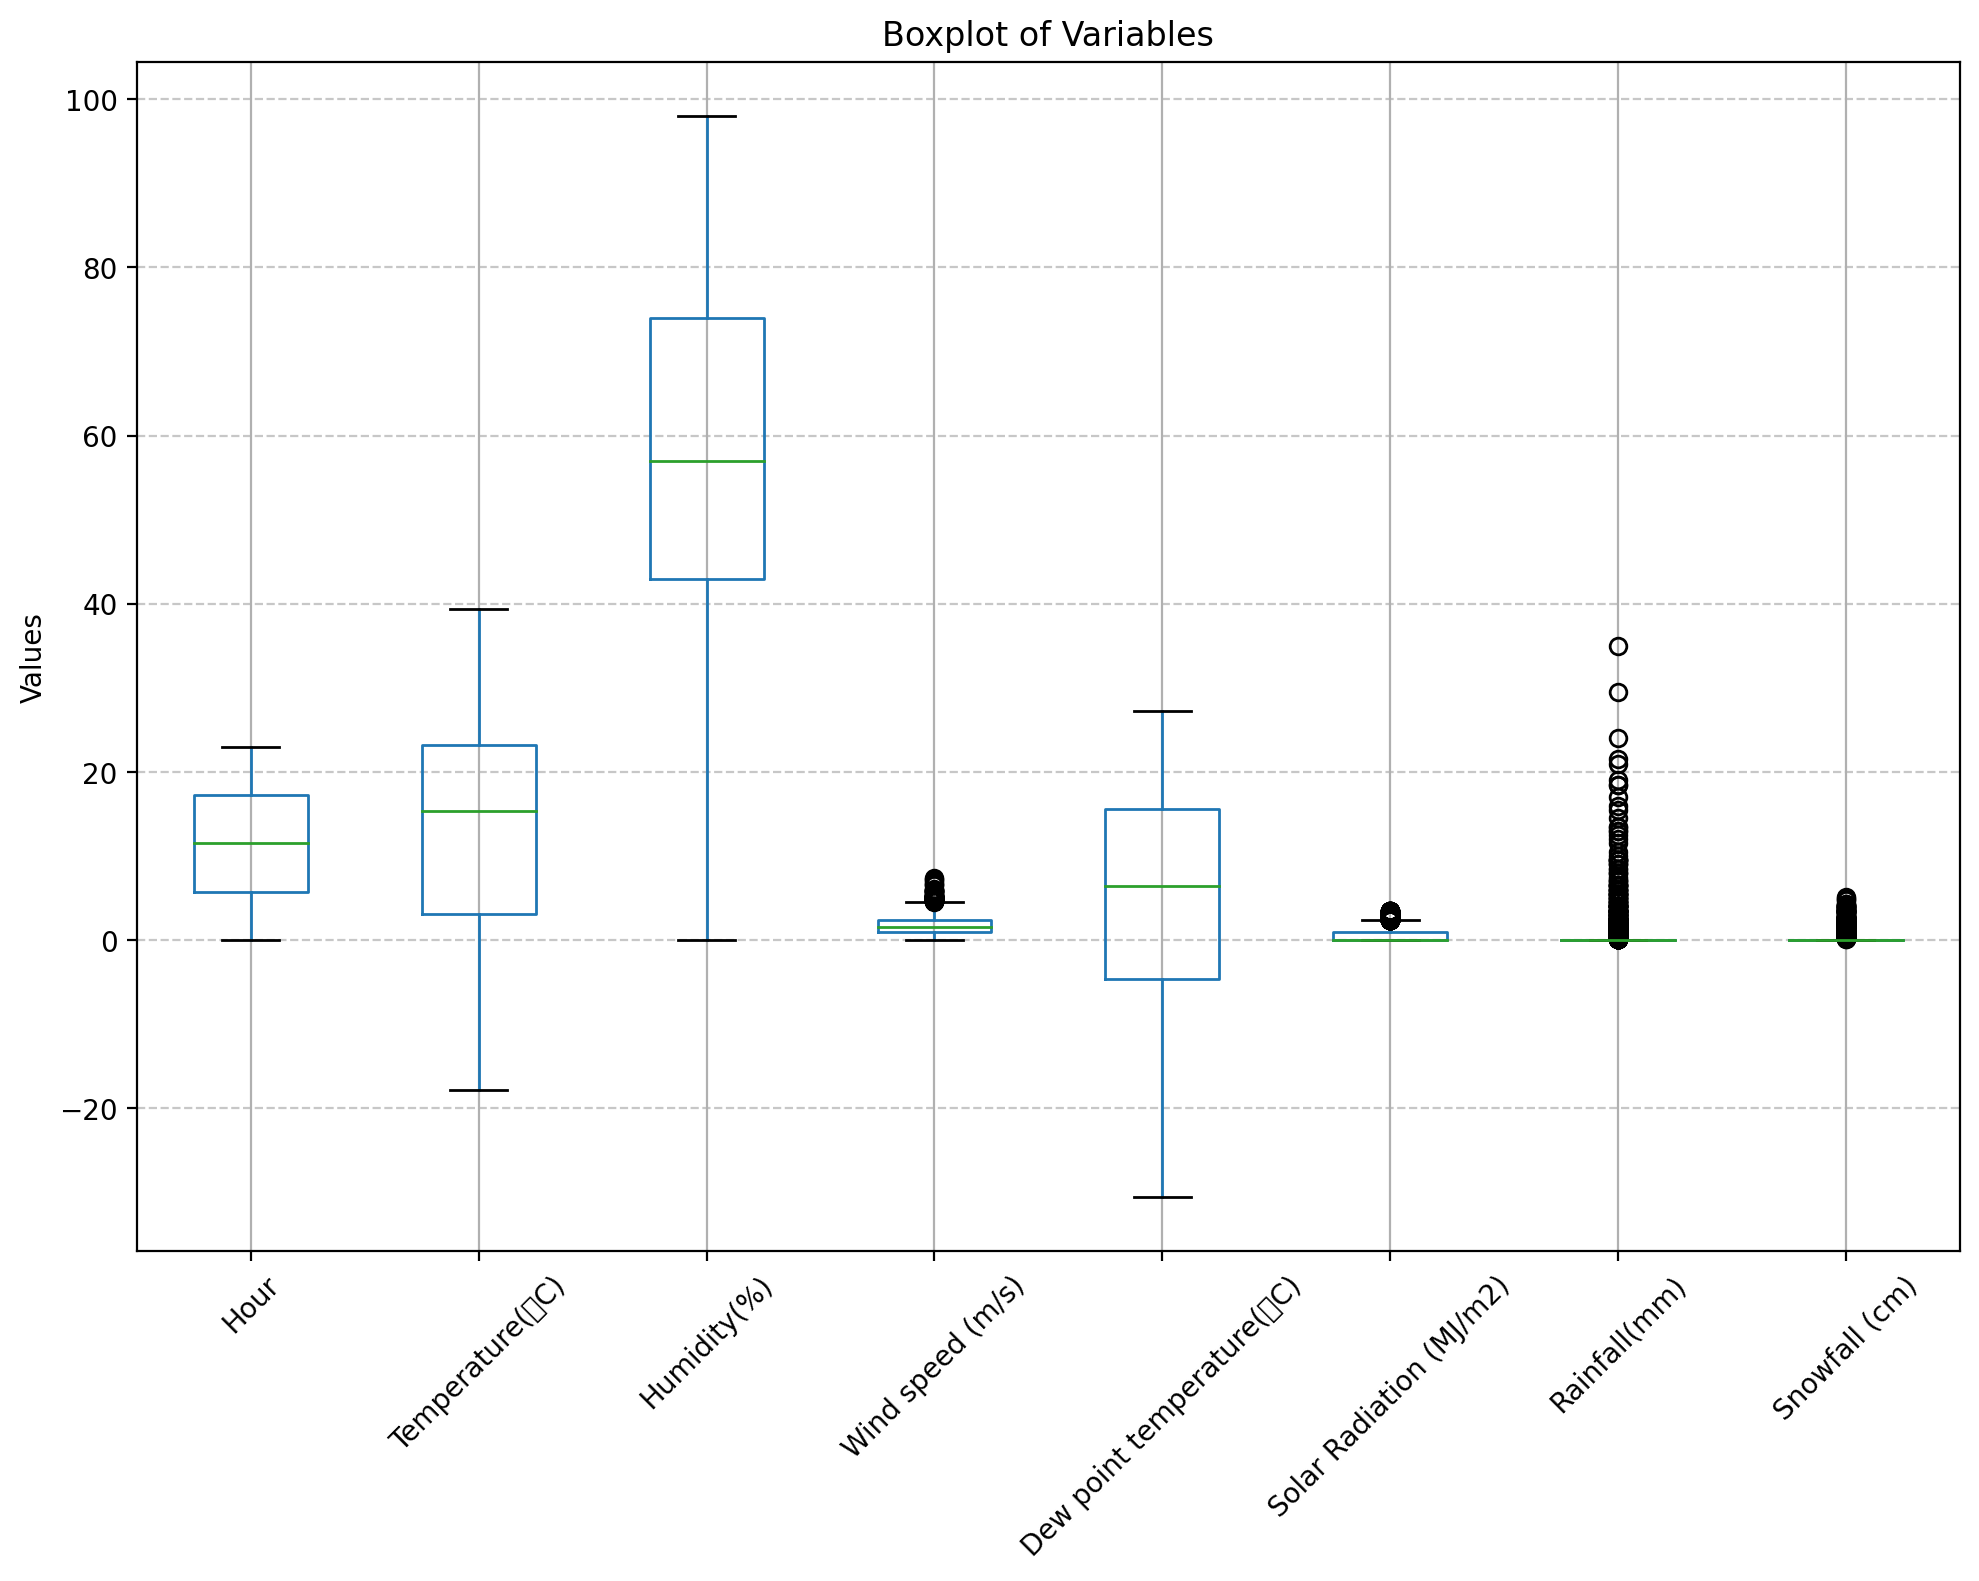

In [556]:
## train1 모든 변수에 대해 boxplot 확인 후 이상치 확인
df_train1_subset = df_train1.drop(columns=['Rented Bike Count', 'Visibility (10m)'])
## 'Rented Bike Count', 'Visibility (10m)' 이 세 변수를 포함해 Boxplot 그리면 잘 안보임

plt.figure(figsize=(10,8))
df_train1_subset.boxplot()
plt.title('Boxplot of Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

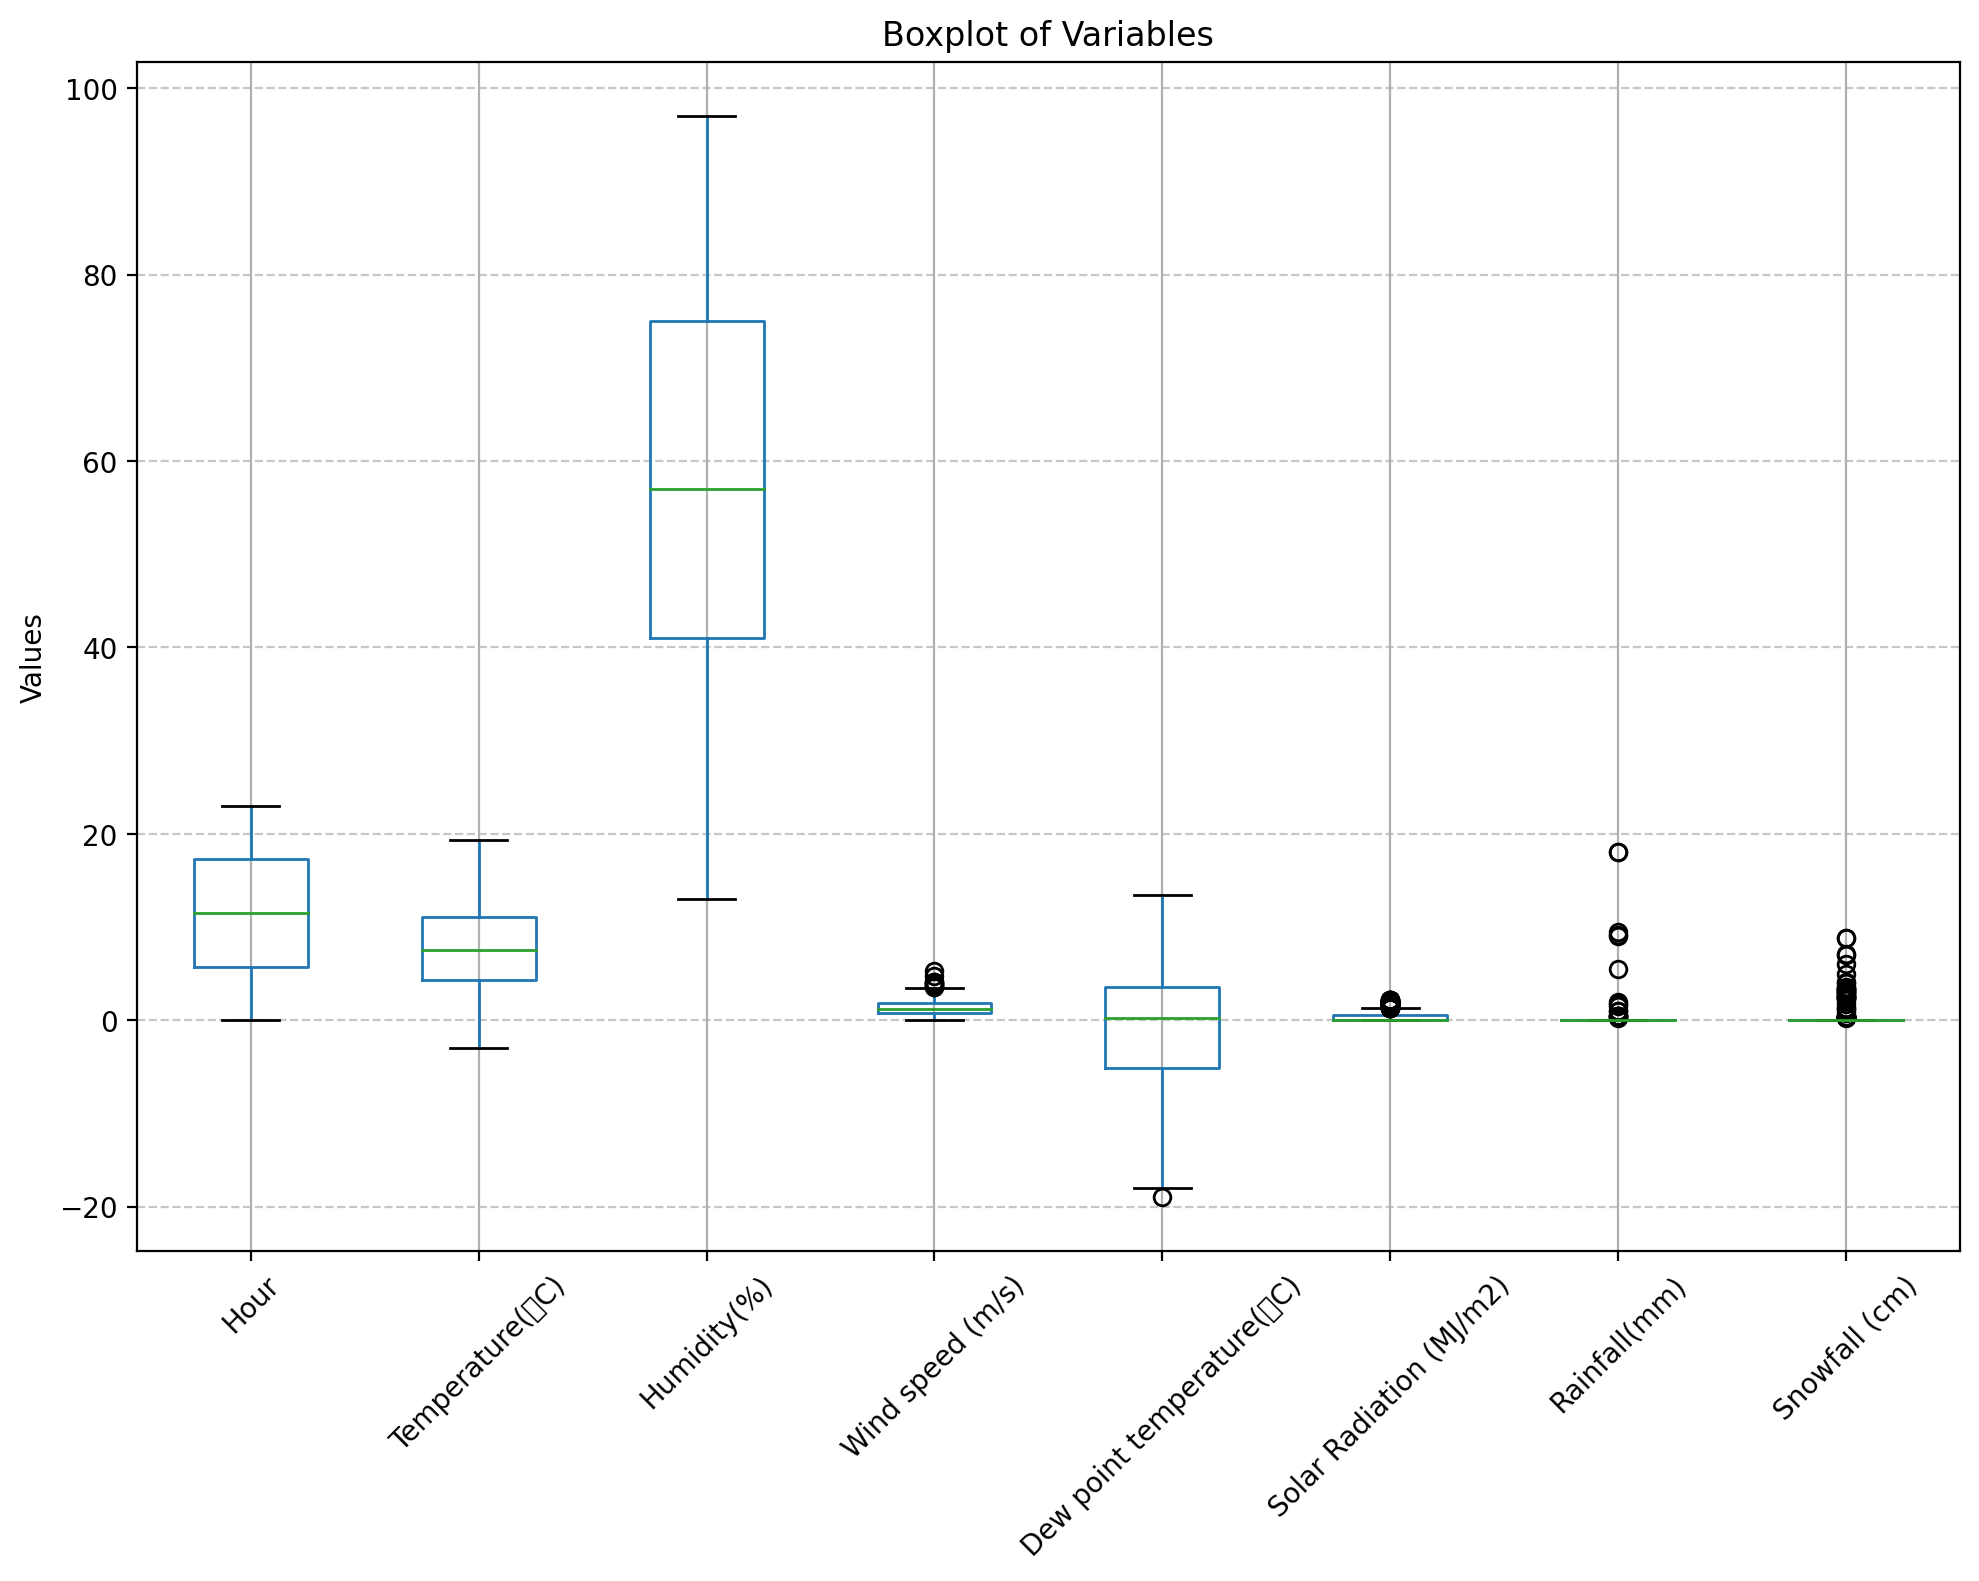

In [557]:
## test1 모든 변수에 대해 boxplot 확인 후 이상치 확인
df_teat1_subset = df_test1.drop(columns=['Visibility (10m)'])
## 'Rented Bike Count', 'Visibility (10m)' 이 세 변수를 포함해 Boxplot 그리면 잘 안보임

plt.figure(figsize=(10,8))
df_teat1_subset.boxplot()
plt.title('Boxplot of Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

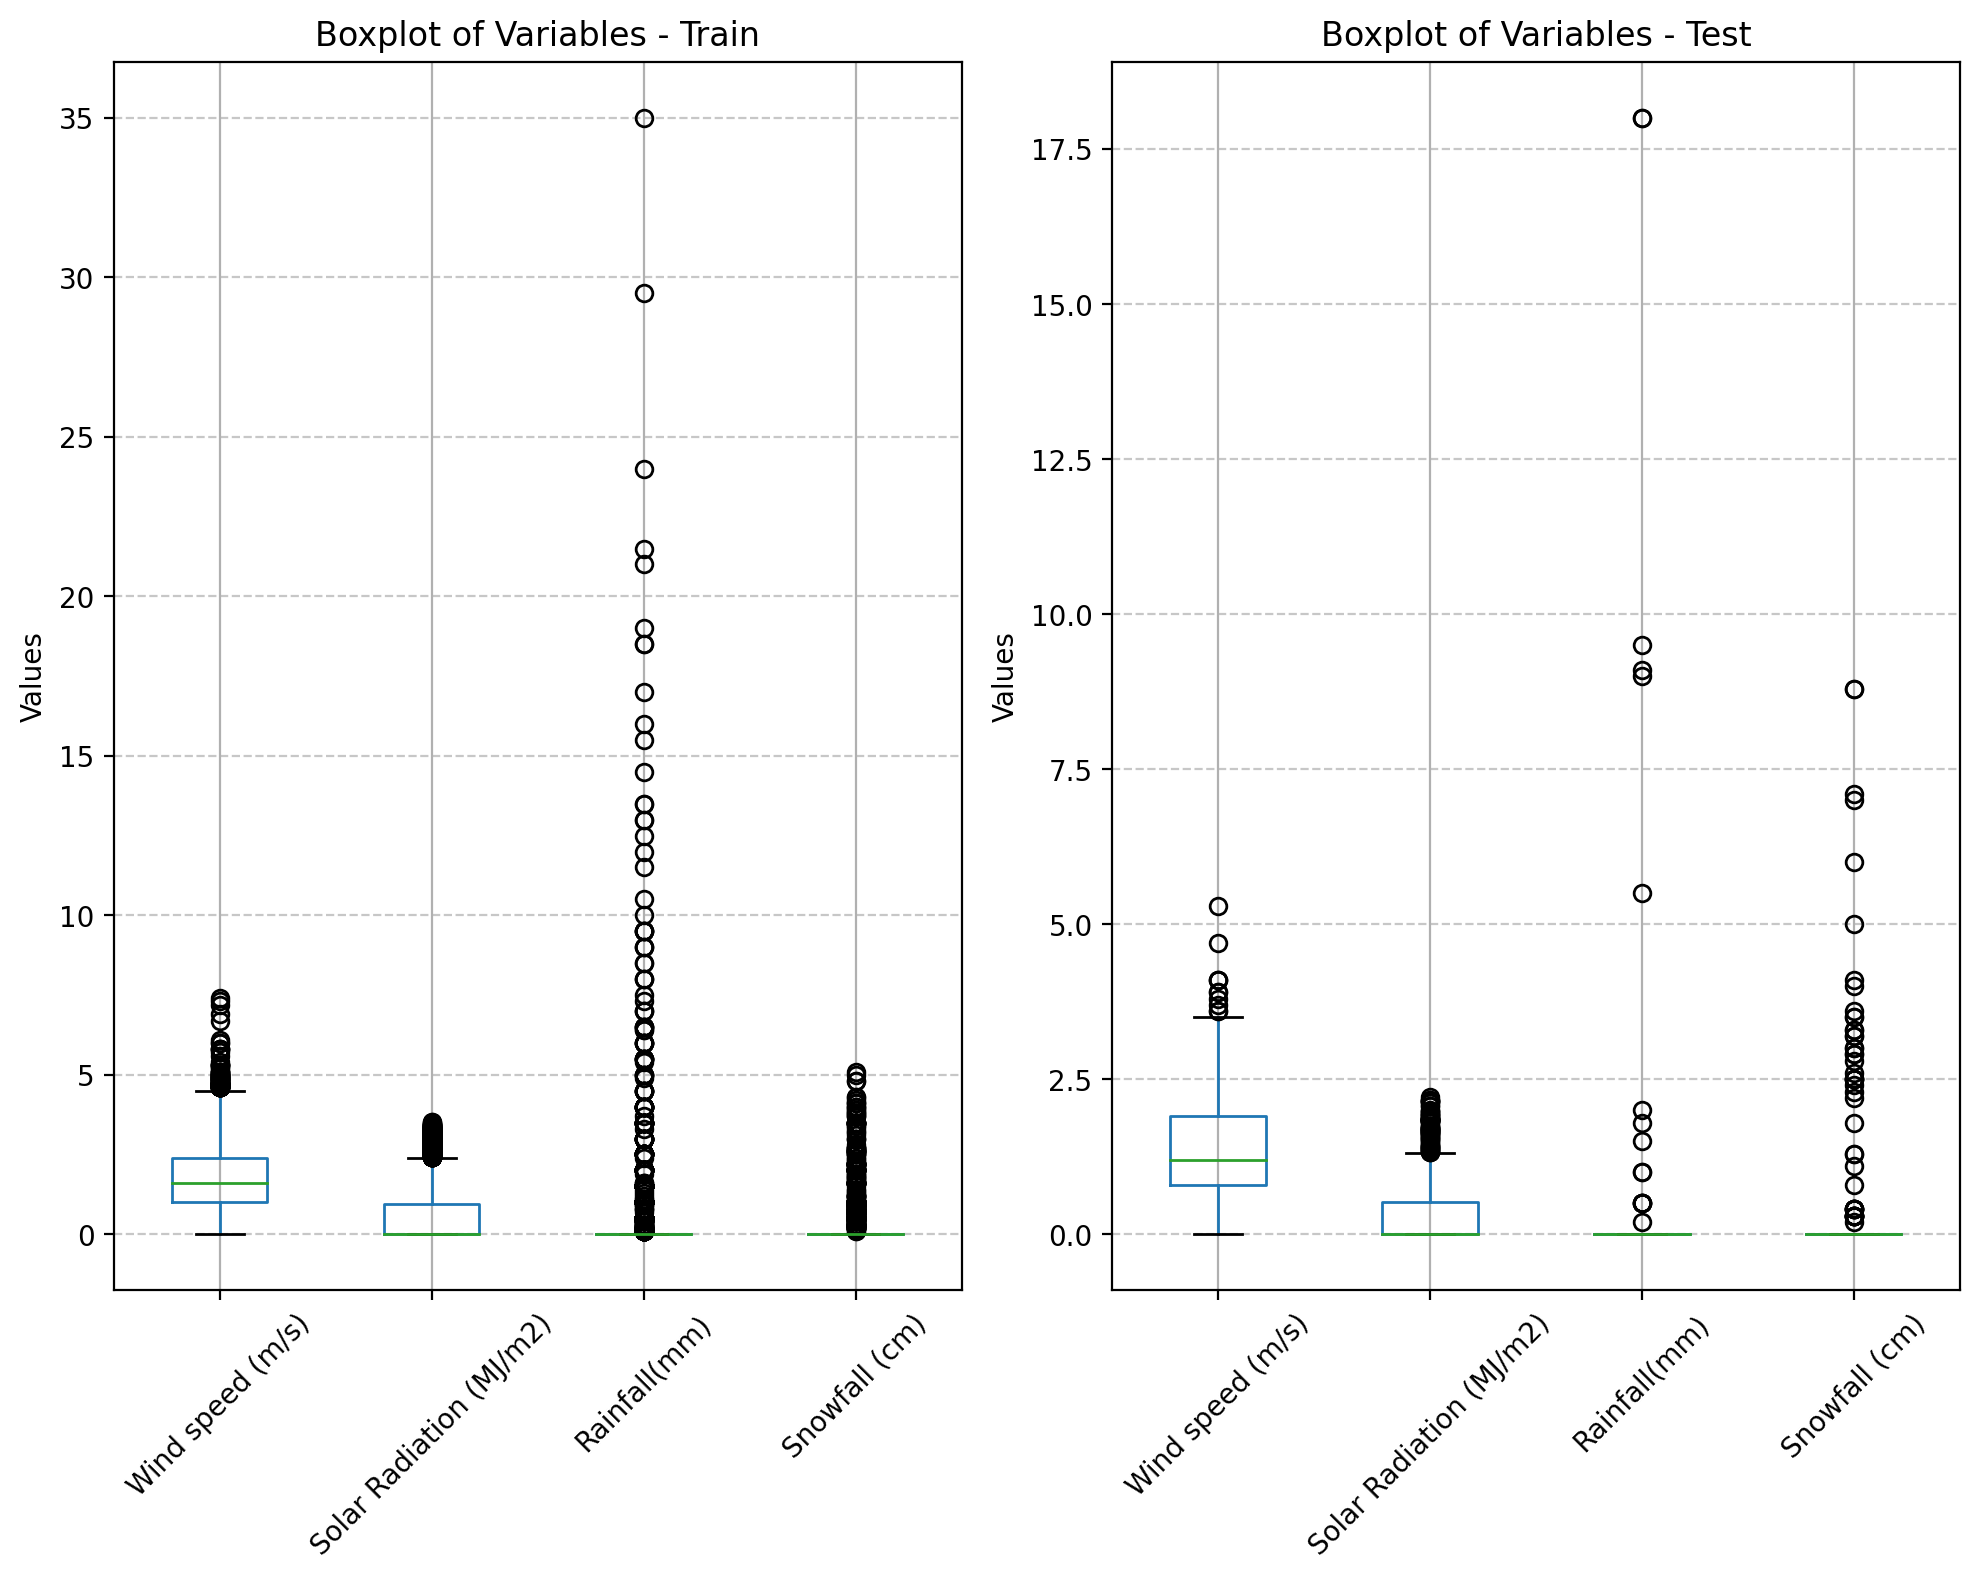

In [558]:
# train 데이터셋에서 필요한 열만 선택
df_train1_subset = df_train[['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]

# test 데이터셋에서 필요한 열만 선택
df_test1_subset = df_test[['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]

# Boxplot 그리기
plt.figure(figsize=(10, 8))

# train 데이터셋에 대한 Boxplot
plt.subplot(1, 2, 1)
df_train1_subset.boxplot()
plt.title('Boxplot of Variables - Train')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# test 데이터셋에 대한 Boxplot
plt.subplot(1, 2, 2)
df_test1_subset.boxplot()
plt.title('Boxplot of Variables - Test')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [559]:
## 풍속을 제외한 나머지 데이터에서는 outlier가 존재함
## 태양복사량은 해가 떠있는 시점에만 계산하기 때문에 이상치 나올 수 있음
## 눈, 비의 경우 오는날로만 계산해야 하고, 장마나 폭설등의 이유로 이상치 나올 수 있음

##### 풍속 데이터의 이상치 확인
- 기상청에 근거하면 서울의 연평균 풍속은 2.3m/s 이며
 9월에 1.9정도로 가장 낮고, 4월에 2.7m정도로 가장 높다고 한다.
 따라서 풍속데이터에는 이상치가 있는것으로 판단.
- 0~7 m/s 의 풍속이면 전 작업이 실시될 수 있는 안전 작업 범위에 속한다고 함
- 태풍이 올 경우 풍속이 높게 나타날 수 있기 때문에 풍속이 7이상인 행이 태풍이 올 수 있는 월인지를 확인해야 함
- 실제 날씨를 확인해 본 결과 강풍 주의인 날이 있음. 따라서 풍속 데이터에도 딱히 이상치 없음



In [560]:
# 풍속 데이터에서 7 이상의 값을 가지는 행 선택
wind_speed_gt_7 = df_train1['Wind speed (m/s)'] >= 6
selected_rows = df_train1[wind_speed_gt_7]
# 선택된 행 출력
print(selected_rows)


            Date  Rented Bike Count  Hour  Temperature(째C)  Humidity(%)  \
933   08/01/2018                146    21             0.70           77   
1309  24/01/2018                140    13           -12.00           25   
2174  01/03/2018                375    14             1.20           36   
3133  10/04/2018                967    13            21.90           34   
3134  10/04/2018                913    14            21.20           35   
3135  10/04/2018                933    15            21.40           33   
3137  10/04/2018               1004    17            20.60           39   
3138  10/04/2018               1805    18            19.70           52   
3140  10/04/2018                336    20            19.10           58   
3141  10/04/2018                133    21            17.45           70   
6316  21/08/2018                 49     4            25.30           70   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(째C)  \
933                6.7      

#### function day에 대해서 값이 0인 행 제거
- 운휴일이면 자전거 대여수 0이기 때문에 


In [561]:
# 'Functioning Day' 열에서 값이 'Yes'인 행만 선택
df_train1 = df_train1[df_train1['Functioning Day'] == 'Yes']
df_train1['Functioning Day'].unique()


array(['Yes'], dtype=object)

In [562]:
df_test1 = df_test1[df_test1['Functioning Day'] == 'Yes']
df_test1['Functioning Day'].unique()

array(['Yes'], dtype=object)

## 2차 전처리

### 범주형 데이터 수치화 (one-hot encoding)
- 명목형 데이터 : Seasons, Holiday, Functioning Day

In [563]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7817 non-null   object 
 1   Rented Bike Count          7817 non-null   int64  
 2   Hour                       7817 non-null   int64  
 3   Temperature(째C)            7817 non-null   float64
 4   Humidity(%)                7817 non-null   int64  
 5   Wind speed (m/s)           7817 non-null   float64
 6   Visibility (10m)           7817 non-null   int64  
 7   Dew point temperature(째C)  7817 non-null   float64
 8   Solar Radiation (MJ/m2)    7817 non-null   float64
 9   Rainfall(mm)               7817 non-null   float64
 10  Snowfall (cm)              7817 non-null   float64
 11  Seasons                    7817 non-null   object 
 12  Holiday                    7817 non-null   object 
 13  Functioning Day            7817 non-null   object 
dt

In [564]:

# 변수 타입의 변화
df_test.Holiday = df_test.Holiday.astype('category')
df_test['Functioning Day'] = df_test['Functioning Day'].astype('category')
df_test.Seasons = df_test.Seasons.astype('category')

df_test



,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
716,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
717,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
718,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


##### 명목형 변수 수치화

In [565]:
print(df_train1['Seasons'].unique(),
      df_train1['Holiday'].unique(),
      df_train1['Functioning Day'].unique())

['Winter' 'Spring' 'Summer' 'Autumn'] ['No Holiday' 'Holiday'] ['Yes']


In [566]:
## test data set 에는 가을, 공휴일 아닌날, 운영일, 운휴일이 있음
print(df_test1['Seasons'].unique(),
      df_test1['Holiday'].unique(),
      df_test1['Functioning Day'].unique())

['Autumn'] ['No Holiday'] ['Yes']


In [567]:
df_train2 = df_train1.copy()
df_test2 = df_test1.copy()

## Winter 0 Spring 1 Summer 2 Autumn 3
df_train2['Seasons_numbers'] = df_train2['Seasons'].map({'Winter':0,'Spring':1, 'Summer':2, 'Autumn':3})
df_test2['Seasons_numbers'] = df_test2['Seasons'].map({'Winter':0,'Spring':1, 'Summer':2, 'Autumn':3})

In [568]:
## Holiday Yes 1  Holiday No 0

df_train2['Holiday_numbers'] = df_train2['Holiday'].map({'No Holiday':0, 'Holiday':1})
df_test2['Holiday_numbers'] = df_test2['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [569]:
## Functioning Yes 1 Functioning No 0
df_train2['Functioning Day_numbers'] = df_train2['Functioning Day'].map({'Yes':1, 'No':0})
df_test2['Functioning Day_numbers'] = df_test2['Functioning Day'].map({'Yes':1, 'No':0})

In [570]:
train_fin = df_train2
test_fin = df_test2

### 변수 선택
- Solar Radiation, Wind speed, Visibility 은 모델링에 사용하지 않을예정
- Solar Raduation 은 낮 시간대에만 영향을 미침
- Wind speed 는 자전거 대여수에 큰 영향을 미치지 않는 것으로 파악 됨
- 가시성 역시 자전거 대여수에 큰 영향을 미치지않는 것으로 파악 됨


In [571]:
## "Solar Radiation","Wind speed (m/s)","Visibility (10m)"은 모델링에 사용하지 않을 것임
train1_final = train_fin.drop(['Date','Seasons','Holiday','Functioning Day',"Solar Radiation (MJ/m2)","Wind speed (m/s)","Visibility (10m)"], axis=1)
train1_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 0 to 8039
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          7817 non-null   int64  
 1   Hour                       7817 non-null   int64  
 2   Temperature(째C)            7817 non-null   float64
 3   Humidity(%)                7817 non-null   int64  
 4   Dew point temperature(째C)  7817 non-null   float64
 5   Rainfall(mm)               7817 non-null   float64
 6   Snowfall (cm)              7817 non-null   float64
 7   Seasons_numbers            7817 non-null   int64  
 8   Holiday_numbers            7817 non-null   int64  
 9   Functioning Day_numbers    7817 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 671.8 KB


In [572]:
test1_final = test_fin.drop(['Date','Seasons','Holiday','Functioning Day',"Solar Radiation (MJ/m2)","Wind speed (m/s)","Visibility (10m)"], axis=1)
test1_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 719
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       648 non-null    int64  
 1   Temperature(째C)            648 non-null    float64
 2   Humidity(%)                648 non-null    int64  
 3   Dew point temperature(째C)  648 non-null    float64
 4   Rainfall(mm)               648 non-null    float64
 5   Snowfall (cm)              648 non-null    float64
 6   Seasons_numbers            648 non-null    int64  
 7   Holiday_numbers            648 non-null    int64  
 8   Functioning Day_numbers    648 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 50.6 KB


##### 로그변환


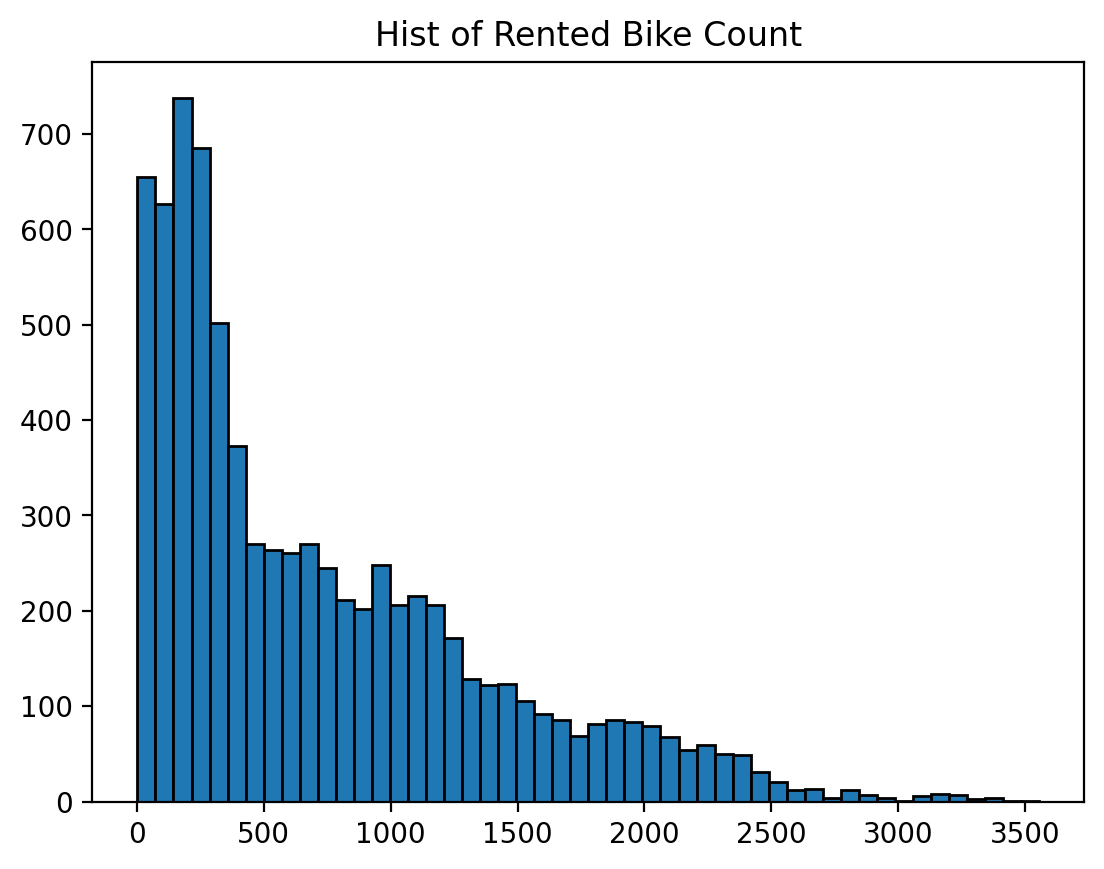

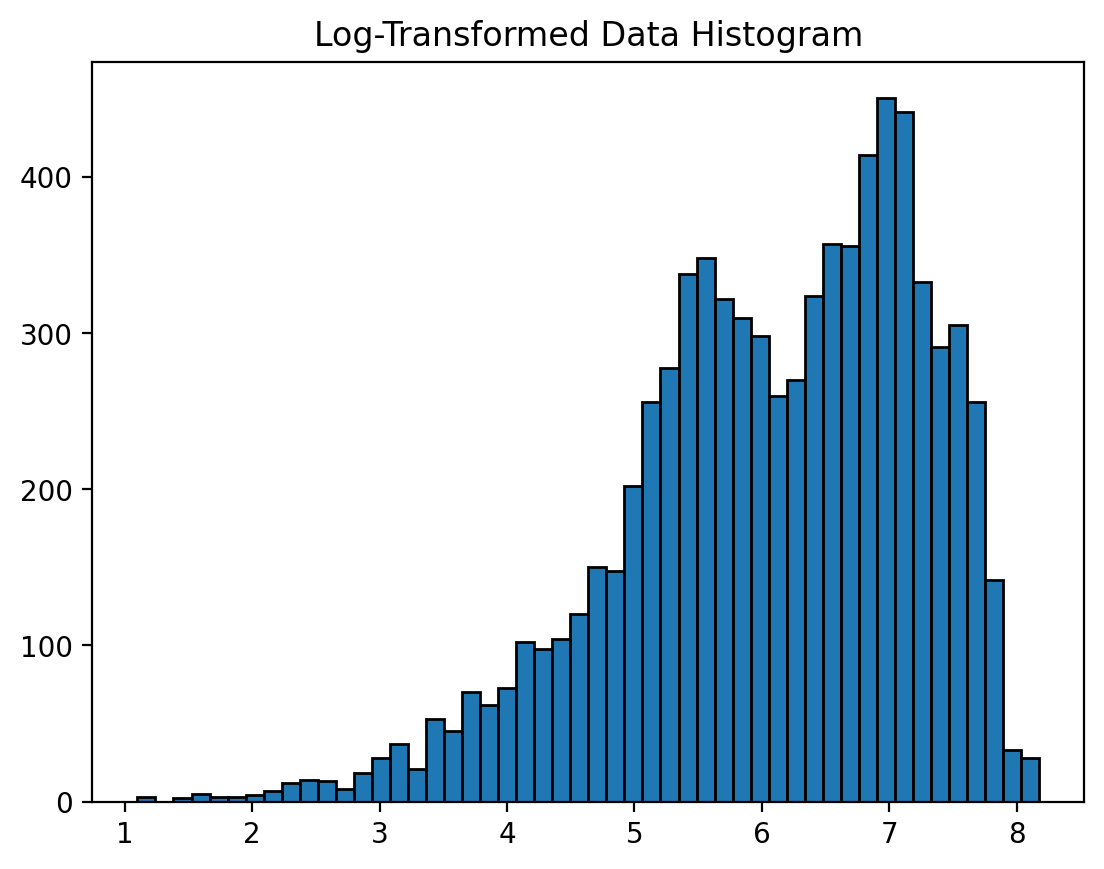

In [573]:
## 최종 train set 의 대여수 hist
plt.hist(train_fin['Rented Bike Count'], bins=50, edgecolor='black')
plt.title('Hist of Rented Bike Count')
plt.show()

## 최종 train set 의 대여수, 로그 변환 후 hist
log_trans_data = np.log1p(train_fin['Rented Bike Count']) 

plt.hist(log_trans_data, bins=50, edgecolor='black')
plt.title('Log-Transformed Data Histogram')
plt.show() #이번엔 우측으로 치우친거같기도..

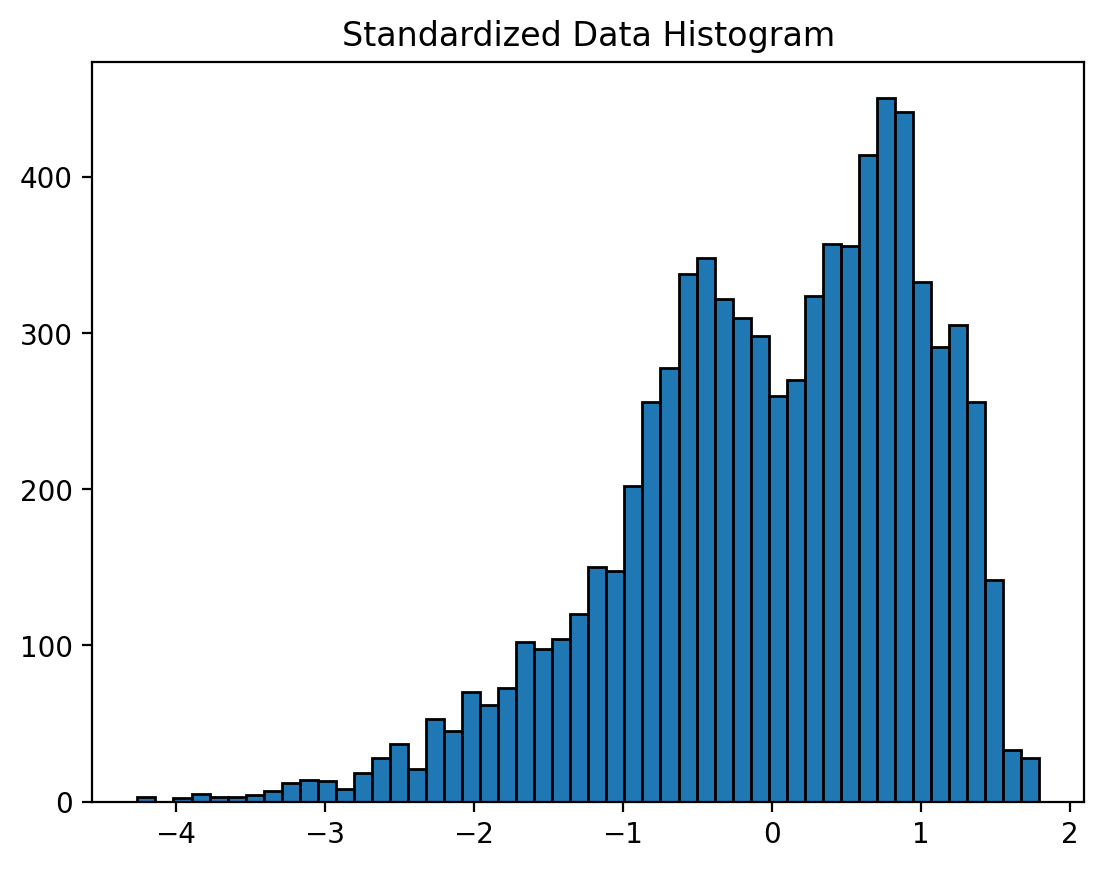

In [574]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터를 표준화하기 위해 scaler를 사용하여 fit 및 transform
standardized_data = scaler.fit_transform(log_trans_data.values.reshape(-1, 1))

# 표준화된 데이터를 히스토그램으로 표시
plt.hist(standardized_data, bins=50, edgecolor='black')
plt.title('Standardized Data Histogram')
plt.show()


### train, valid, test set 분리
- valid set 분리만 한번 해주면 됨
- 과제용 데이터에는 train, test set 이미 존재함

In [575]:
# X(독립변수), y(종속변수) 분리
from sklearn.model_selection import train_test_split

X_train = train1_final.drop('Rented Bike Count', axis=1)
y_train = train1_final['Rented Bike Count']

In [576]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, #valid dataset의 비율 20프로
                                                      shuffle=True, random_state = 0)

In [577]:
## 데이터셋 분리 후 차원확인
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(6253, 9) (1564, 9) (6253,) (1564,)


In [578]:
x_test = test1_final.copy()

In [579]:
print(x_test.info(), train1_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 719
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       648 non-null    int64  
 1   Temperature(째C)            648 non-null    float64
 2   Humidity(%)                648 non-null    int64  
 3   Dew point temperature(째C)  648 non-null    float64
 4   Rainfall(mm)               648 non-null    float64
 5   Snowfall (cm)              648 non-null    float64
 6   Seasons_numbers            648 non-null    int64  
 7   Holiday_numbers            648 non-null    int64  
 8   Functioning Day_numbers    648 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 50.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 0 to 8039
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Cou

## 4. 모델학습

#### 1) Decision Tree
- 조합에 대한 의사결정규칙
- 해석 수월

In [580]:
model_decisiontree = DecisionTreeRegressor(# max_depth = 5,
                        random_state = 42)
## 일반적으로 random_state의 값은 0, 42, 2022 등으로 사용한다는데,,,

In [581]:
## 하이퍼파라미터 확인하기
print(model_decisiontree.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


하이퍼파라미터 설명
- ccp_alpha: Cost Complexity Pruning(비용 복잡성 가지치기)의 파라미터로, 음이 아닌 값일 때 트리를 가지치기하는데 사용, 기본값 0.0.
- criterion: 노드의 분할 기준을 정의하는데 사용되는 기준. 'squared_error'는 평균 제곱 오차를 사용
- max_depth: 트리의 최대 깊이를 제한하는 파라미터로 None으로 설정되면 깊이에 제한이 없음
- max_features: 각 노드에서 분할에 사용될 최대 특성의 수, None으로 설정되면 모든 특성을 사용.
- max_leaf_nodes: 리프 노드의 최대 수를 제한하는 파라미터 None으로 설정되면 제한이 없음
- min_impurity_decrease: 불순도 감소 최소치를 지정하는데 사용, 이 값보다 작은 감소가 있는 분할은 무시
- min_samples_leaf: 리프 노드가 가져야 하는 최소 샘플 수를 지정
- min_samples_split: 노드를 분할하기 위해 필요한 최소 샘플 수를 지정
- min_weight_fraction_leaf: 가중치가 부여된 샘플의 총 가중치 합에서 차지하는 비율
- random_state: 모델을 재현 가능하게 만들기 위한 난수 시드(seed)
- splitter: 각 노드에서 데이터를 분할할 때 사용되는 전략, 'best'는 최적의 분할을 찾는 것을 의미

In [582]:
## 모델 학습
model_decisiontree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [583]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


y_pred_dt = model_decisiontree.predict(x_valid)

# Mean Squared Error
mse = mean_squared_error(y_valid, y_pred_dt)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# MAE
mae = mean_absolute_error(y_valid, y_pred_dt)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error
rmse = mean_squared_error(y_valid, y_pred_dt, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# R-squared
r_squared = r2_score(y_valid, y_pred_dt)
print(f'R-squared (R^2): {r_squared:.4f}')


Mean Squared Error (MSE): 118068.8262
Mean Absolute Error (MAE): 201.63011508951408
Root Mean Squared Error (RMSE): 343.6114
R-squared (R^2): 0.7334


In [584]:
def model_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    F1 = f1_score(y_test, y_pred, average='macro')
    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))
    print(classification_report(y_test, y_pred, average='macro'))


In [585]:
unique_values = set(x_valid)
print(unique_values)
print("Number of unique values:", len(unique_values))


{'Temperature(째C)', 'Holiday_numbers', 'Seasons_numbers', 'Snowfall (cm)', 'Functioning Day_numbers', 'Rainfall(mm)', 'Dew point temperature(째C)', 'Humidity(%)', 'Hour'}
Number of unique values: 9


In [586]:
# pred = model1.predict(x_valid)
# model_eval(y_valid, pred)
model_decisiontree.predict(x_valid)

array([ 761.,   88.,  920., ...,  427.,  524., 1469.])

#### 랜덤포레스트
- x, y 의 샘플수가 정확하게 일치해야 함
- 따릉이 데이터셋에서는 일치하지 않음으로 사이킷런에서 오류가 발생함


In [587]:
# 모델선언
from sklearn.ensemble import RandomForestRegressor

model_randomfor = RandomForestRegressor(random_state=42)

In [588]:
print(model_randomfor.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


 랜덤포레스트의 하이퍼파라미터
 -  n_estimators : Decision Tree 개수 지정, default = 10, 클수록 시간 오래걸림
 - min_samples_split : 최소한의 샘플 데이터 수 > 과적합 제거하는데 사용, 작을수록 분할 노드가 많아져 과적합 가능성 증가
 - min_samples_leaf : 리프노드가 되이 위한 최소한의 샘플 데이터 수
 - max_depth : 트리 최대 깊이
 - max_features : 피처의 최대 갯수

In [589]:
# model_randomfor 그리드서치 수행시간 너무 길어짐

# ## 그리드 서치를 위한 하이퍼파라미터 그리드 정의
# params_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# ## 그리드 서치 객체 생성
# grid_search = GridSearchCV(estimator=model_randomfor, param_grid=params_grid, cv=5, scoring='neg_mean_squared_error')

# ## 그리드 서치 수행
# grid_search.fit(x_train, y_train)

# ## 최적의 하이퍼파라미터와 성능 출력
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", -grid_search.best_score_)  # 음의 평균 제곱 오차를 양으로 변환하여 출력

# ## 최적의 모델 선택
# best_model = grid_search.best_estimator_

In [590]:
model_randomfor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [591]:
# 모델을 사용하여 예측 수행
y_pred_rf = model_randomfor.predict(x_valid)

# Mean Squared Error (MSE) 계산
mse_rf = mean_squared_error(y_valid, y_pred_rf)
print(f'Mean Squared Error (MSE): {mse_rf:.4f}')

# Mean Absolute Error (MAE) 계산
mae_rf = mean_absolute_error(y_valid, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")

# Root Mean Squared Error (RMSE) 계산
rmse_rf = mean_squared_error(y_valid, y_pred_rf, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.4f}')

# R-squared (결정 계수) 계산
r_squared_rf = r2_score(y_valid, y_pred_rf)
print(f'R-squared (R^2): {r_squared_rf:.4f}')


Mean Squared Error (MSE): 68787.8479
Mean Absolute Error (MAE): 158.3292
Root Mean Squared Error (RMSE): 262.2744
R-squared (R^2): 0.8447


### 그래디언트 부스팅

In [592]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss = 'squared_error', #n_estimators= 13,
                                # max_depth=2, random_state=0 
                                )
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [593]:
print(gbr.predict(x_train))

[1120.44444711 1224.90594482  151.73360983 ...  285.79582788  660.91415745
  437.87964814]


In [538]:
# 모델을 사용하여 예측 수행
y_pred_gbr = gbr.predict(x_valid)

# Mean Squared Error (MSE) 계산
mse_gbr = mean_squared_error(y_valid, y_pred_gbr)
print(f'Mean Squared Error (MSE): {mse_rf:.4f}')

# Mean Absolute Error (MAE) 계산
mae_gbr = mean_absolute_error(y_valid, y_pred_gbr)
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")

# Root Mean Squared Error (RMSE) 계산
rmse_gbr = mean_squared_error(y_valid, y_pred_gbr, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.4f}')

# R-squared (결정 계수) 계산
r_squared_gbr = r2_score(y_valid, y_pred_gbr)
print(f'R-squared (R^2): {r_squared_rf:.4f}')

Mean Squared Error (MSE): 68787.8479
Mean Absolute Error (MAE): 158.3292
Root Mean Squared Error (RMSE): 262.2744
R-squared (R^2): 0.8447


DecisionTreeReg
- Mean Squared Error (MSE): 118068.8262
- Mean Absolute Error (MAE): 201.63011508951408
- Root Mean Squared Error (RMSE): 343.6114
- R-squared (R^2): 0.7334

Randomforest
- Mean Squared Error (MSE): 68787.8479
- Mean Absolute Error (MAE): 158.3292
- Root Mean Squared Error (RMSE): 262.2744
- R-squared (R^2): 0.8447

Gradientboost
- Mean Squared Error (MSE): 68728.7845
- Mean Absolute Error (MAE): 157.6969
- Root Mean Squared Error (RMSE): 262.1618
- R-squared (R^2): 0.8448

> 초기 결과에서는 그래디언트 부스팅 방법이 가장 성능이 좋았는데, 데이터 특성과 전처리를 수정하는 과정에서 모델간의 성능이 비슷하게 나타나짐

## 하이퍼파라미터 튜닝
- 최종 모델 선택도 gradientboosting 모델로 선택할 것이므로 하이퍼파라미터 튜닝도 gbr 모델로 진행
- gbr 선택 이유 : 4주차때 조사했던 모델링 방법이며, 랜덤포레스트보다 수행시간이 길지만 일반적으로 더 높은 정확도를 보여주기 때문

### 트리기반 모델이라서 스케일링이 필요없음

- 그래디언트 부스팅 모델은 경사하강법을 이용해 학습이 진행되므로, 적절한 학습률을 지정하는 것이 중요하다고 함, 따라서 데이터의 단위를 조정해주는 작업을 거치는 경우도 있음

#### GridSearch
- Date 변수까지 제거해서 스케일링
- 사실 gbm 에서는 스케일링 필요 없음

In [510]:
## 행 수 일치함
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("Length of X_train:", len(x_train))
print("Length of y_train:", len(y_train))


X_train shape: (6253, 9)
y_train shape: (6253,)
Length of X_train: 6253
Length of y_train: 6253


In [511]:
## 수행시간 조금 김
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


# 탐색할 하이퍼파라미터 그리드 정의
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

## 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=gbr, param_grid=params_grid, cv=5, scoring='neg_mean_squared_error')

## 그리드 서치 수행
grid_search.fit(x_train, y_train)

## 최적의 하이퍼파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

## 최적의 모델 선택
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Best Score: -54811.06347762671


In [512]:
## Best Parameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
## Best Score: -54811.06347762671 양수로 바꾸고 MSE라고 생각하면 됨

## 사이킷런에서는 교차 검증 함수가 평균 제곱 오차를 최적화 하기 때문
## MSE 값이 작을수록 모델의 성능이 더 좋다고 생각하면 되는데
## 개큰디?


In [513]:
## gs 결과 데이터프레임화
gbr_gs_result = pd.DataFrame(grid_search.cv_results_)

In [514]:
## 테스트세트 정확도 확인
score = gbr.score(x_train, y_train)
print('테스트 세트 정확도 : {:.3F} '.format(score))

테스트 세트 정확도 : 0.863 


## 과적합여부 판단

In [515]:
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt

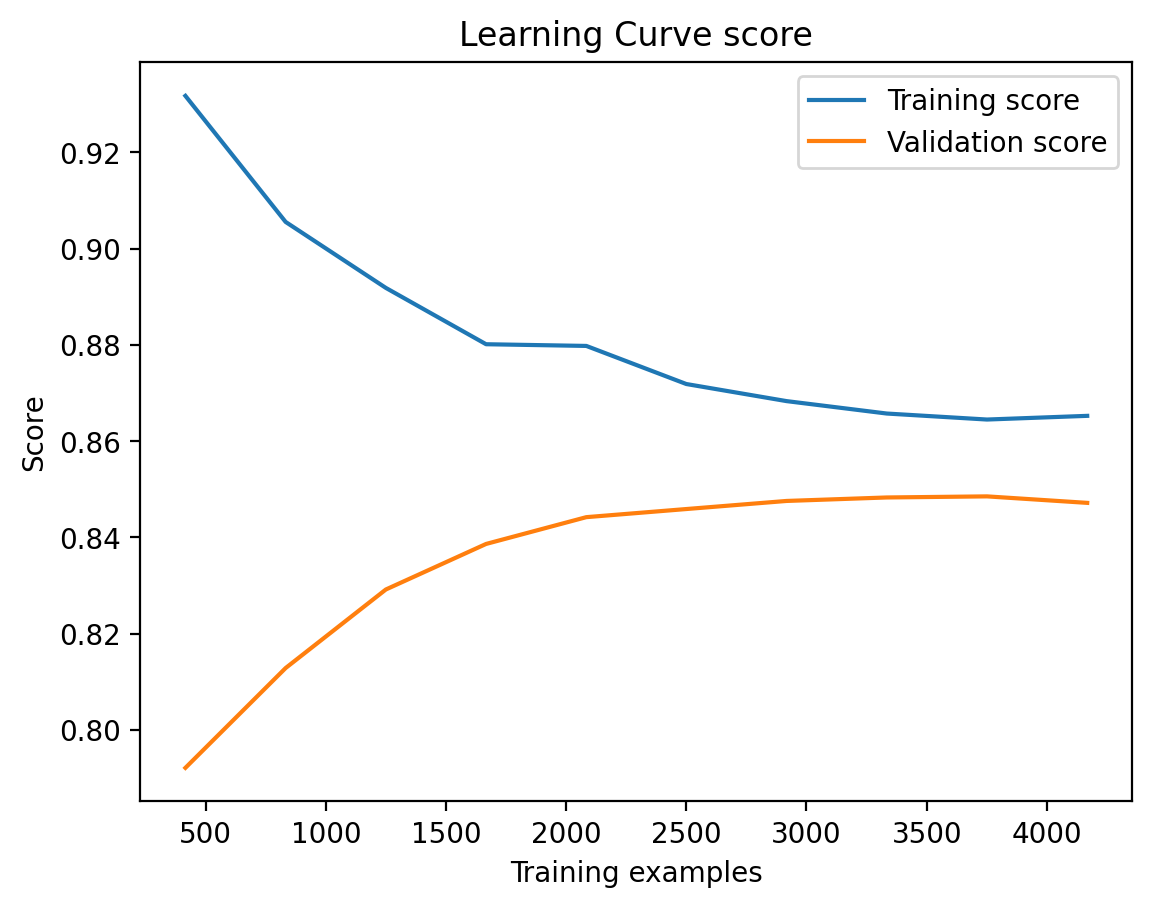

In [516]:
gbr.fit(x_train, y_train)

# 학습 곡선 그려보기 - score
train_sizes, train_scores, val_scores = learning_curve(gbr, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curve score')
plt.show()

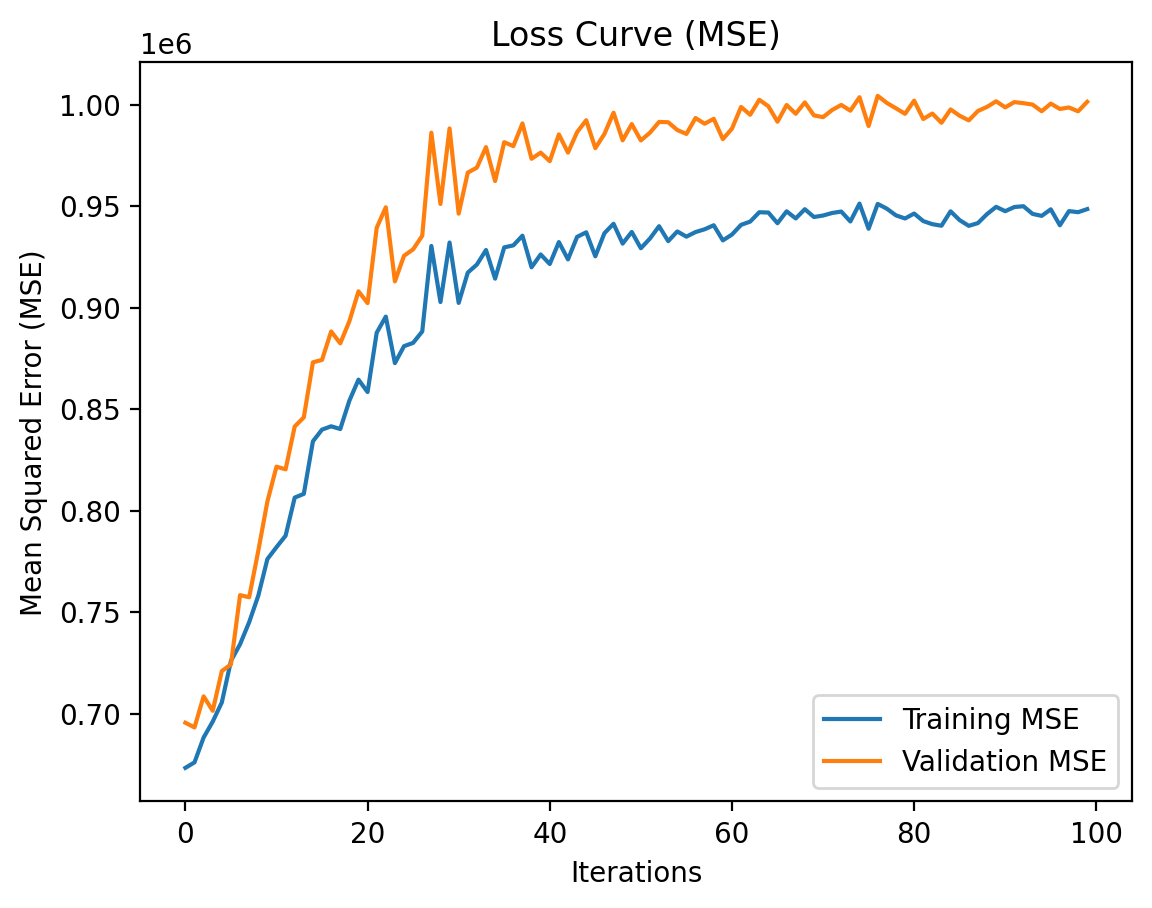

In [518]:
## loss 계산
train_losses = []
val_losses = []

for estimator in gbr.estimators_:
    # 훈련 데이터에 대한 예측값 계산
    train_pred = estimator[0].predict(x_train)
    # 훈련 데이터에 대한 MSE 계산 및 저장
    train_losses.append(mean_squared_error(y_train, train_pred))
    
    # 검증 데이터에 대한 예측값 계산
    val_pred = estimator[0].predict(x_valid)
    # 검증 데이터에 대한 MSE 계산 및 저장
    val_losses.append(mean_squared_error(y_valid, val_pred))

# 손실 곡선 시각화
plt.plot(train_losses, label='Training MSE')
plt.plot(val_losses, label='Validation MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Loss Curve (MSE)')
plt.show()


In [420]:
## 손실함수를 통해서 Training과 validation에 대해 증가하고 있어 과적합 되고 있다는 것을 알 수 있음

## 여기서 한계점. 과적합이 발생했고 손실함수가 증가하는 문제 발생

## 변수 중요도 
- 온도가 가장 큰 영향을 미치며, 시간, 습도, 강수량 등이 대여량에 많은 영향을 미침
- test data에는 계절이 가을만 있어, 봄, 여름의 데이터보다는 가을, 겨울의 데이터가 더 큰 영향을 미친 것으로 파악됨


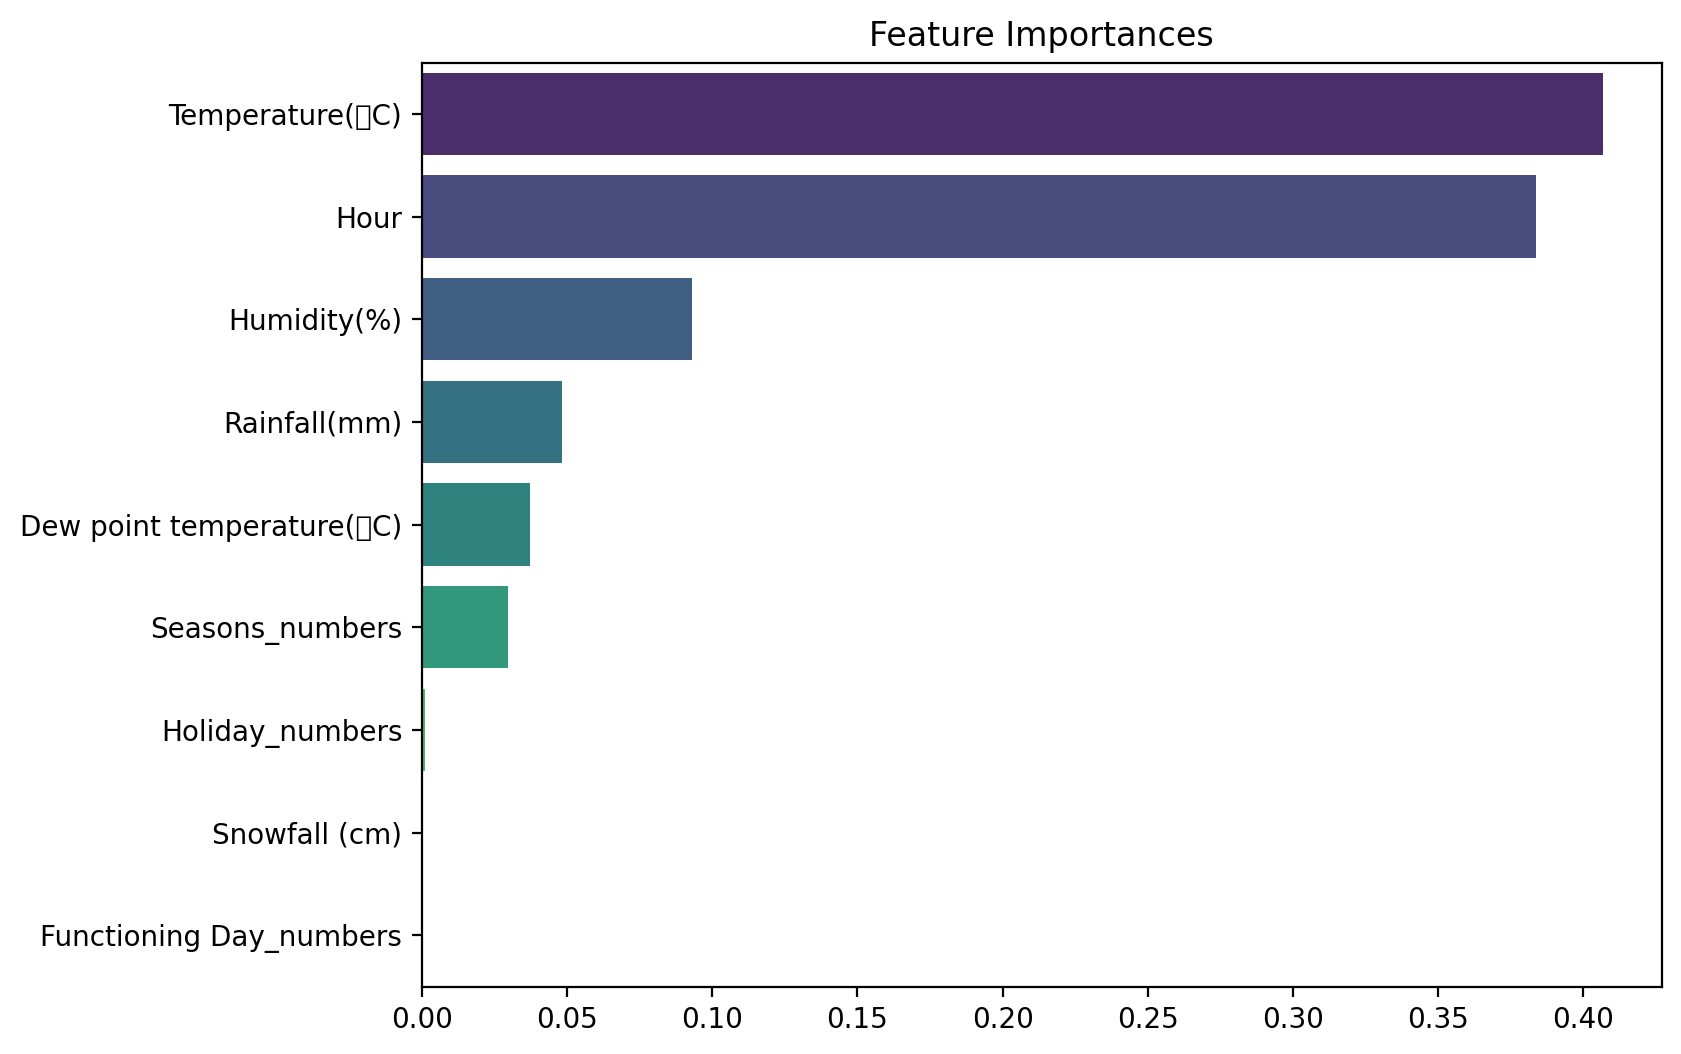

In [519]:
## 변수 중요도 계산
importances_values = pd.Series(gbr.feature_importances_, index=x_valid.columns).sort_values(ascending=False)

# 시각화
colors = sns.color_palette("viridis", len(importances_values))
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index, palette=colors)
plt.show()

## 최종 - test data 예측

In [520]:
fin_model = gbr
fin_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [527]:
# feature 순서 저장, 정렬
feat_order = x_train.columns
x_test = x_test[feat_order]

# 모델 예측
predictions = gbr.predict(x_test)

# 예측 결과를 데이터프레임으로 변환
predictions_df = x_test.copy()
predictions_df['Rented Bike Count'] = predictions
predictions_df['Rented Bike Count'] = predictions_df['Rented Bike Count'].round(0)
predictions_df

,Hour,Temperature(째C),Humidity(%),Dew point temperature(째C),Rainfall(mm),Snowfall (cm),Seasons_numbers,Holiday_numbers,Functioning Day_numbers,Rented Bike Count
0,0,5.7,62,-1.0,0.0,0.0,3,0,1,539.0
1,1,5.1,65,-0.9,0.0,0.0,3,0,1,428.0
2,2,4.4,64,-1.8,0.0,0.0,3,0,1,333.0
3,3,4.2,65,-1.8,0.0,0.0,3,0,1,268.0
4,4,3.6,70,-1.3,0.0,0.0,3,0,1,248.0
...,...,...,...,...,...,...,...,...,...,...
715,19,4.2,34,-10.3,0.0,0.0,3,0,1,1028.0
716,20,3.4,37,-9.9,0.0,0.0,3,0,1,909.0
717,21,2.6,39,-9.9,0.0,0.0,3,0,1,876.0
718,22,2.1,41,-9.8,0.0,0.0,3,0,1,839.0


In [526]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 719
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       648 non-null    int64  
 1   Temperature(째C)            648 non-null    float64
 2   Humidity(%)                648 non-null    int64  
 3   Dew point temperature(째C)  648 non-null    float64
 4   Rainfall(mm)               648 non-null    float64
 5   Snowfall (cm)              648 non-null    float64
 6   Seasons_numbers            648 non-null    int64  
 7   Holiday_numbers            648 non-null    int64  
 8   Functioning Day_numbers    648 non-null    int64  
 9   Rented Bike Count          648 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 55.7 KB


In [530]:
predictions_df.to_csv('test_fin_data.csv', index = False)

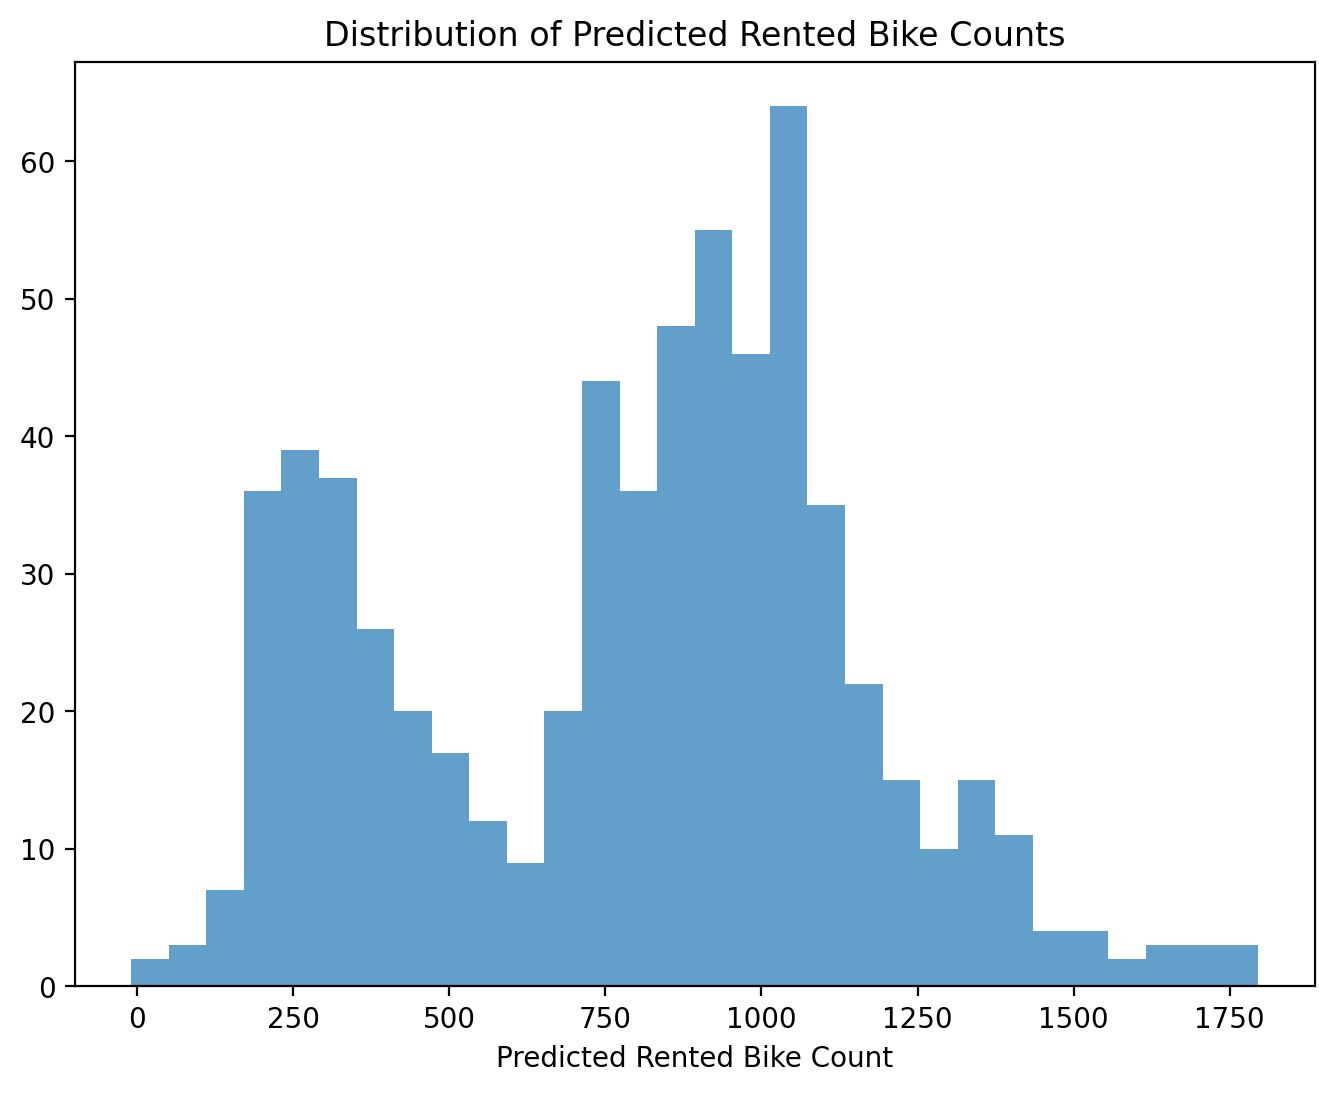

In [534]:
## 예측 결과 시각화
plt.figure(figsize=(8, 6))
plt.hist(predictions_df['Rented Bike Count'], bins=30, alpha=0.7)
plt.title('Distribution of Predicted Rented Bike Counts')
plt.xlabel('Predicted Rented Bike Count')
plt.show()